# Lab6 CNNs

## Team member 
Xiaoqing Zou, Jonathan Mejia, Rongwei Ji

## Data introduction 
Data source: https://www.kaggle.com/datasets/yousefmohamed20/oxford-102-flower-dataset


## 1.Preparation 
###  1.1  (1.5) Choose and explain what metric(s) you will use to evaluate your algorithm’s performance

We opt for the Confusion Matrix to assess the model algorithm. With multiple classes or follower categories, this metric enables us to discern which classes are effectively identified. It aids in recognizing areas where the model may encounter confusion between different classes, shedding light on its performance.

The Confusion Matrix highlights instances where the CNN misclassifies follower types. By identifying patterns of confusion between different types, we can uncover potential weaknesses in the model's feature extraction or classification process, guiding adjustments to enhance accuracy.


### 1.2 (1.5)Method Dividing  data 
The original data already divid into the train and test. Let's check them how they distribute.

train image amount: [27, 38, 35, 49, 36, 68, 73, 38, 44, 38, 36, 60, 65, 38, 49, 46, 34, 47, 72, 35, 34, 33, 36, 55, 62, 36, 61, 48, 36, 31, 28, 33, 62, 92, 44, 33, 44, 54, 97, 49, 100, 73, 33, 157, 61, 57, 38, 54, 73, 206, 67, 70, 47, 56, 92, 50, 86, 56, 35, 85, 36, 48, 42, 42, 88, 51, 36, 43, 46, 33, 51, 64, 77, 147, 142, 95, 83, 205, 112, 34, 70, 82, 135, 82, 104, 66, 48, 48, 51, 116, 153, 41, 66, 59, 53, 34, 132, 101, 72, 54, 68, 50]
test image amount: [5, 3, 8, 4, 6, 9, 9, 6, 3, 4, 3, 9, 6, 7, 5, 3, 2, 4, 7, 2, 5, 5, 3, 6, 9, 2, 14, 2, 6, 8, 5, 6, 7, 8, 8, 5, 6, 8, 14, 4, 16, 11, 3, 21, 3, 5, 3, 4, 8, 24, 8, 14, 4, 7, 8, 11, 14, 7, 9, 10, 8, 4, 4, 5, 7, 4, 4, 3, 3, 6, 4, 9, 11, 28, 14, 13, 4, 25, 14, 3, 10, 11, 13, 17, 14, 10, 10, 5, 6, 13, 15, 2, 14, 8, 11, 6, 16, 14, 9, 5, 4, 7]


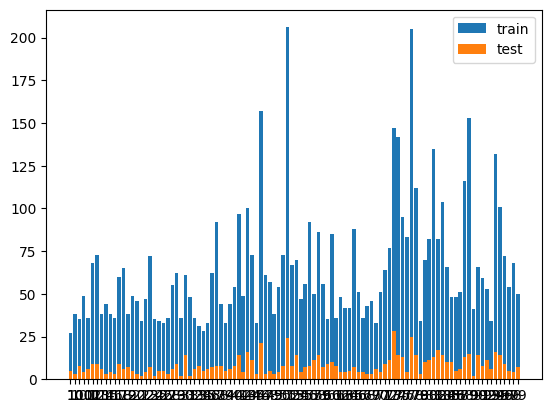

In [1]:
# check the 102 flowers dataset and how the image amount in different categre in train folder and test folder
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

# check the image amount in different categre in train folder and test folder

def check_image_amount():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    train_categories = os.listdir(train_dir)
    test_categories = os.listdir(test_dir)
    train_categories.sort()
    test_categories.sort()
    train_image_amount = []
    test_image_amount = []
    for category in train_categories:
        train_image_amount.append(len(os.listdir(os.path.join(train_dir, category))))
    for category in test_categories:
        test_image_amount.append(len(os.listdir(os.path.join(test_dir, category))))
    print('train image amount:', train_image_amount)
    print('test image amount:', test_image_amount)
    plt.bar(train_categories, train_image_amount, label='train')
    plt.bar(test_categories, test_image_amount, label='test')
    plt.legend()
    plt.show()

check_image_amount()

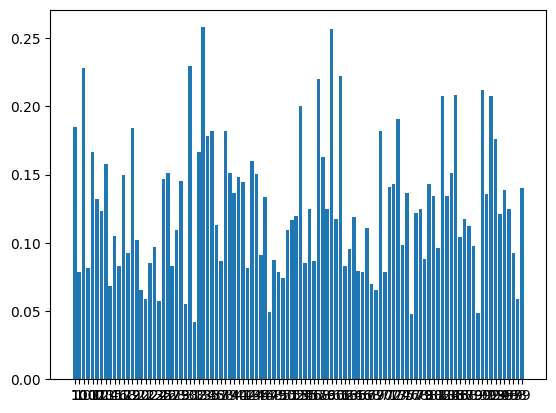

In [2]:
# show the rate of the train and test image amount in different categre

def show_rate():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    train_categories = os.listdir(train_dir)
    test_categories = os.listdir(test_dir)
    train_categories.sort()
    test_categories.sort()
    train_image_amount = []
    test_image_amount = []
    for category in train_categories:
        train_image_amount.append(len(os.listdir(os.path.join(train_dir, category))))
    for category in test_categories:
        test_image_amount.append(len(os.listdir(os.path.join(test_dir, category))))
    train_image_amount = np.array(train_image_amount)
    test_image_amount = np.array(test_image_amount)
    rate = test_image_amount / train_image_amount
    plt.bar(train_categories, rate)
    plt.show()

show_rate()

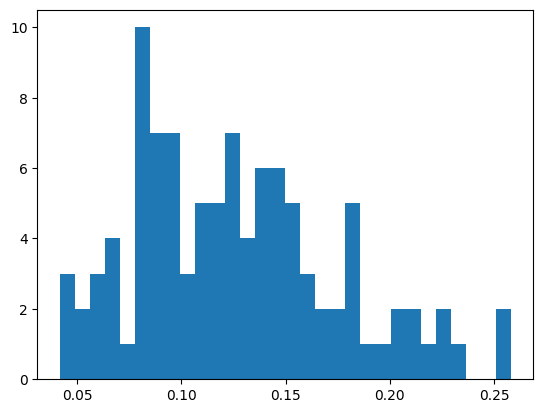

In [3]:
# show the rate distribution of the train and test image amount in different categre

def show_rate_distribution():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    train_categories = os.listdir(train_dir)
    test_categories = os.listdir(test_dir)
    train_categories.sort()
    test_categories.sort()
    train_image_amount = []
    test_image_amount = []
    for category in train_categories:
        train_image_amount.append(len(os.listdir(os.path.join(train_dir, category))))
    for category in test_categories:
        test_image_amount.append(len(os.listdir(os.path.join(test_dir, category))))
    train_image_amount = np.array(train_image_amount)
    test_image_amount = np.array(test_image_amount)
    rate = test_image_amount / train_image_amount
    plt.hist(rate, bins=30)
    plt.show()

show_rate_distribution()

Based on the analysis above, the dataset is totaly imbalanced, we decide use ShuffleSplit to do the divding the data. Due to the some categries has the few data and some may have more, shufflesplit would be suitable for this situation. 

When working with limited computational resources or time constraints, ShuffleSplit can be more efficient than stratified 10-fold cross-validation.

In the case of small categories with few images, ShuffleSplit can be particularly useful. By generating random splits, ShuffleSplit provides the opportunity for samples from small categories to appear in both the training and test sets, which can help prevent the exclusion of these categories from the evaluation process.



# 2 Modeling

2.1 data augmentation

In [67]:
    # training to use data expansion in Keras
    # data expansion techniques 
    # Keras augmentation layers


In [4]:
import tensorflow as tf


import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import average 
from tensorflow.keras.models import  Model


# keras version


In [5]:
# SKip it 


#  recombine all the test and train data into one data set and build model , combine all the data into the newflower folder

import time;
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

start_time=time.time()

# already combine
def combine_data():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    new_dir = './102 flower/flowers/newflower'
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    for category in os.listdir(train_dir):
        if not os.path.exists(os.path.join(new_dir, category)):
            os.makedirs(os.path.join(new_dir, category))
        for image in os.listdir(os.path.join(train_dir, category)):
            shutil.copy(os.path.join(train_dir, category, image), os.path.join(new_dir, category, image))
    for category in os.listdir(test_dir):
        if not os.path.exists(os.path.join(new_dir, category)):
            os.makedirs(os.path.join(new_dir, category))
        for image in os.listdir(os.path.join(test_dir, category)):
            shutil.copy(os.path.join(test_dir, category, image), os.path.join(new_dir, category, image))

# already combine no need run it again
combine_data()

end_time=time.time()
print('time cost',end_time-start_time,'s')

time cost 20.653880834579468 s


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time 

# we have the sized image in the newflower folder, we need to get the data to X y
# do not need the original 
# 2 m toad the original photo to mamnery 
statt=time.time()

# get the data to X y from the  newflower folder
def get_data():
    new_dir = './102 flower/flowers/newflower'
    X = []
    y = []
    for category in os.listdir(new_dir):
        for image in os.listdir(os.path.join(new_dir, category)):
            img = Image.open(os.path.join(new_dir, category, image))
            img = img.resize((128, 128))
            img = np.array(img) / 255.0
            X.append(img)
            y.append(category)
    X = np.array(X)
    y = np.array(y)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = keras.utils.to_categorical(y, 102)
    return X, y

# X, y = get_data()
endt=time.time()
print('time cost',endt-statt,'s')
# print(X.shape)



time cost 0.0004863739013671875 s


In [7]:
# shuffle the data and split the data into train and test data 
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# not only onetime , just multiple time to run it

# onetime
# load the data and split the data into train and test data

# X_train, X_test, y_train, y_test = split_data(X, y)

# # plot the plot bewteen the xtran and xtest data
# plt.hist(y_train.argmax(axis=1), bins=102, alpha=0.5, label='train')
# plt.hist(y_test.argmax(axis=1), bins=102, alpha=0.5, label='test')
# plt.legend()
# plt.show()



In [8]:
# summry
# for the model


from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

    


In [19]:
### Data expansion techniques

# image sizde   ImageDataGenerator.

# Keras augmentation layers


In [9]:
# originael model's image size is 224*224 / 


# after fit the X and y , it could geenerat the folder into the new folder named fitedflower and save all the fitted new photo there
# save the fitted photo into the fitedflower folder
def save_fitted_data():
    fitted_dir = './102 flower/flowers/fittedflower'
    if not os.path.exists(fitted_dir):
        os.makedirs(fitted_dir)
    for category in os.listdir('./102 flower/flowers/newflower'):
        if not os.path.exists(os.path.join(fitted_dir, category)):
            os.makedirs(os.path.join(fitted_dir, category))
    for category in os.listdir('./102 flower/flowers/newflower'):
        for image in os.listdir(os.path.join('./102 flower/flowers/newflower', category)):
            img = Image.open(os.path.join('./102 flower/flowers/newflower', category, image))
            img = img.resize((80, 80))
            img.save(os.path.join(fitted_dir, category, image))

# only for first 
save_fitted_data()
# 1m52s


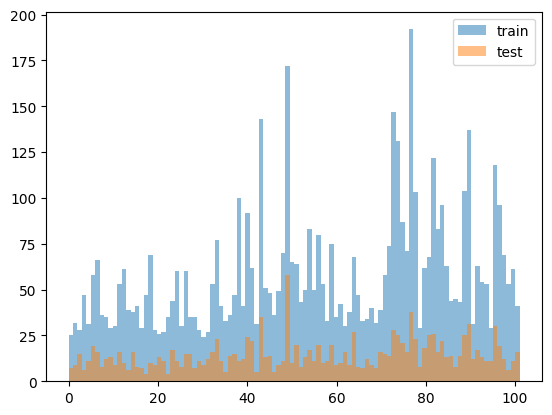

In [10]:
# load the sized image into X,y
from sklearn.preprocessing import LabelEncoder

def get_data():
    new_dir = './102 flower/flowers/fittedflower'
    X = []
    y = []
    for category in os.listdir(new_dir):
        if category != '.DS_Store':
            for image in os.listdir(os.path.join(new_dir, category)):
                img = Image.open(os.path.join(new_dir, category, image))
                img = np.array(img) / 255.0
                X.append(img)
                y.append(category)
    X = np.array(X)
    y = np.array(y)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = keras.utils.to_categorical(y, 102)
    return X, y

X, y = get_data()
# get the shuffle data and split the data into train and test data
X_train, X_test, y_train, y_test = split_data(X, y)

# plot the plot bewteen the xtran and xtest data
plt.hist(y_train.argmax(axis=1), bins=102, alpha=0.5, label='train')
plt.hist(y_test.argmax(axis=1), bins=102, alpha=0.5, label='test')
plt.legend()
plt.show()

### Data expansion techniques

we use the     rotation_range=1,  width_shift_range=0.05,    height_shift_range=0.05

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# use the kaeras to load the image and resize the image to 80*80

# Keras augmentation layers,  
datagen = ImageDataGenerator(
    rotation_range=1,
    width_shift_range=0.05,
    height_shift_range=0.05)

# original X and y is path collection 

# please use the ImageDataGenerator and flow_from_directory to load the image and resize the image to 80*80 to the X and y

# Compute statistics on the data
datagen.fit(X) # generate the tf data 
datagen.fit(X_train) # generate the tf data 

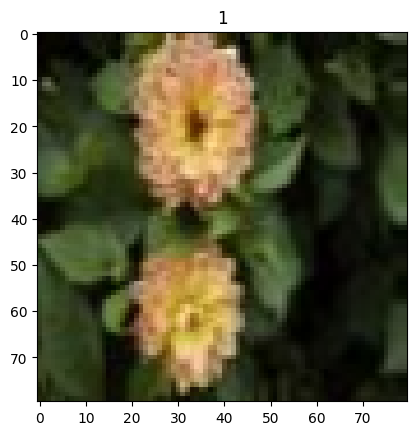

In [48]:
# and one hot encoding the output values
y_train_ohe = keras.utils.to_categorical(y_train, 102)
y_test_ohe = keras.utils.to_categorical(y_test, 102)

tmps = datagen.flow(X_train, y_train_ohe, batch_size=1)
#label is the category of the image
labels = os.listdir('./102 flower/flowers/fittedflower')
for tmp in tmps:
    plt.imshow(tmp[0].squeeze())
    plt.title(labels[np.argmax(tmp[1])])
    break

### Archi 1- Model 1

loss function: Categorical Cross-entroy a

metric  Recall. 

optimizer rmsprop.


In [118]:
# build a cnn model by using the keras and the image size is 80x80 and the classification is 102 

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(102))
    model.add(Activation('softmax'))
    return model

cnn_model1 = build_model()
cnn_model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['Recall'])
cnn_model1.summary()


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)              │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 78, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 78, 78, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 39, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 102)            │        52,326 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 102)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,735,238 (40.95 MB)

 Trainable params: 10,735,238 (40.95 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:
# fit the data 
def fit_model(model, X_train, y_train, X_test, y_test):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

# fit the model
fit_model(cnn_model1, X_train, y_train, X_test, y_test)

Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - Recall: 5.7444e-04 - loss: 4.4999 - val_Recall: 0.0000e+00 - val_loss: 3.7708
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - Recall: 0.0083 - loss: 3.6479 - val_Recall: 0.0339 - val_loss: 3.2901
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - Recall: 0.0415 - loss: 3.1110 - val_Recall: 0.0671 - val_loss: 3.2398
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - Recall: 0.0962 - loss: 2.7622 - val_Recall: 0.1051 - val_loss: 2.8988
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - Recall: 0.1942 - loss: 2.3045 - val_Recall: 0.1397 - val_loss: 3.1516
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - Recall: 0.2900 - loss: 1.9344 - val_Recall: 0.1831 - val_loss: 2.7006
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - Recall: 0.4412 - loss: 1.4380 - val_Recall: 0.2563 - val_loss: 2.8915
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - Recall: 0.5641 - loss: 1.1436 - val_Recall: 0.

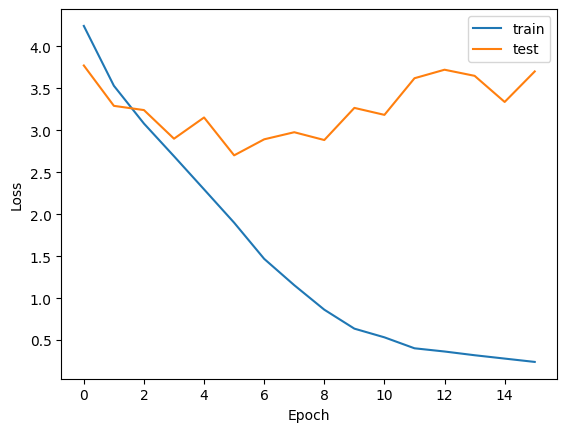

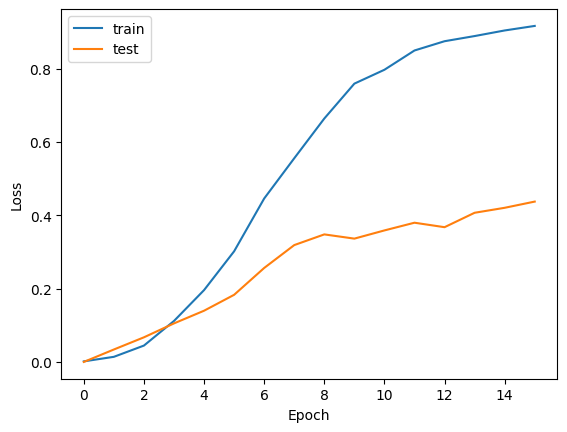

In [120]:
#  loss plot the history of the model
plt.plot(cnn_model1.history.history['loss'], label='train')
plt.plot(cnn_model1.history.history['val_loss'], label='test')
#  x, y label
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# recall plot the history of the model
plt.plot(cnn_model1.history.history['Recall'], label='train')
plt.plot(cnn_model1.history.history['val_Recall'], label='test')
#  x, y label
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [90]:
labels = os.listdir('./102 flower/flowers/newflower')
labels = [file for file in labels if file != ".DS_Store"]
print("count",len(labels),labels)    


def summarize_net(net, X_test, y_test, title_text=''):
    
    plt.figure(figsize=(15,5))

    yhat = np.argmax(net.predict(X_test), axis=1)
    if y_test.ndim > 1:
        y_test = np.argmax(y_test, axis=1)
    acc = mt.recall_score(y_test,yhat,average='micro')

    print("yhat shape",yhat.shape)
    print("ytest shape",y_test.shape)
    
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

def summarize_net_10(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15, 5))

    yhat = np.argmax(net.predict(X_test), axis=1)
    if y_test.ndim > 1:
        y_test = np.argmax(y_test, axis=1)
    acc = mt.recall_score(y_test, yhat, average='micro')

    print("yhat shape", yhat.shape)
    print("ytest shape", y_test.shape)

    cm = mt.confusion_matrix(y_test, yhat)
    cm = cm[:10, :10]  # Selecting only rows and columns corresponding to labels 1 to 10
    cm = cm / np.sum(cm, axis=1)[:, np.newaxis]

    labels = [str(i) for i in range(1, 11)]

    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.title(title_text + ' {:.4f}'.format(acc))
    plt.show()

count 102 ['61', '95', '59', '92', '66', '50', '68', '57', '32', '35', '102', '69', '56', '51', '58', '67', '93', '94', '60', '34', '33', '20', '18', '27', '9', '11', '7', '29', '16', '42', '89', '45', '73', '87', '80', '74', '6', '28', '17', '1', '10', '19', '26', '8', '21', '75', '81', '86', '72', '44', '43', '88', '38', '36', '31', '91', '65', '62', '96', '100', '54', '98', '53', '30', '37', '39', '99', '52', '101', '55', '97', '63', '64', '90', '46', '79', '41', '83', '77', '48', '70', '84', '24', '23', '4', '15', '3', '12', '85', '71', '76', '82', '49', '40', '47', '78', '2', '13', '5', '14', '22', '25']


47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step
yhat shape (1475,)
ytest shape (1475,)


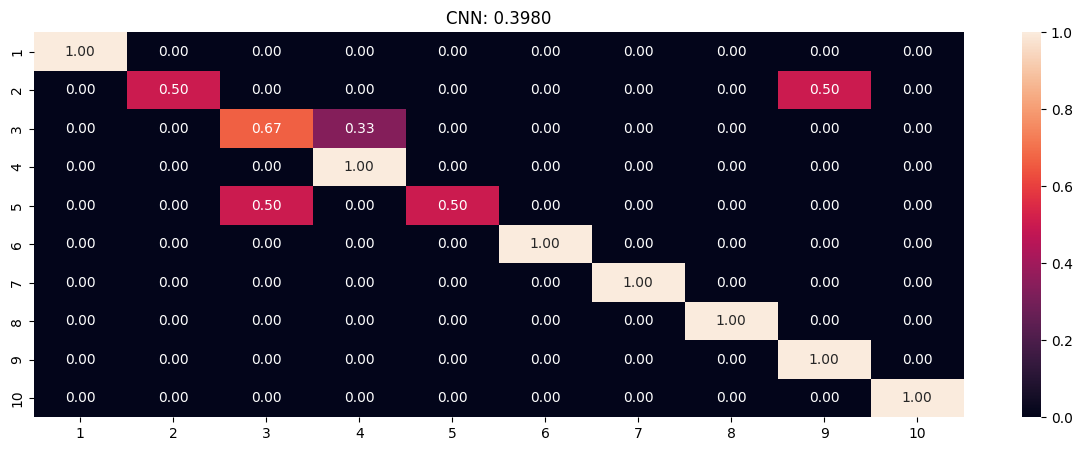

In [91]:
# GETthe y_type 
# only show the 1to 10 confusion matrix
summarize_net_10(cnn_model1, X_test, y_test,title_text='CNN:')

### Archi 1- Model 2
second model ,we change the optimize to adam to try to find if we could increse the recall

In [105]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras.optimizers import Adam

def build_improved_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(102))  # Change output size to match the number of classes
    model.add(Activation('softmax'))
    return model

# Build the improved model
cnn_model2 = build_improved_model()

# Compile the model with Adam optimizer
cnn_model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['Recall'])

# Print model summary
cnn_model2.summary()


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 78, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 78, 78, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 39, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 102)            │        52,326 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 102)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,735,238 (40.95 MB)

 Trainable params: 10,735,238 (40.95 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
print(tf.config.list_physical_devices('GPU'))

[]


In [106]:
%%time
# Fit the improved model
# using CUDA GPU to fit the model



early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
histroy_cnn_model2 = cnn_model2.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 23s 118ms/step - Recall: 2.9127e-04 - loss: 4.4855 - val_Recall: 0.0014 - val_loss: 3.8697
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - Recall: 0.0033 - loss: 3.7729 - val_Recall: 0.0136 - val_loss: 3.3370
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - Recall: 0.0379 - loss: 3.1919 - val_Recall: 0.0319 - val_loss: 3.0824
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - Recall: 0.0872 - loss: 2.7502 - val_Recall: 0.0800 - val_loss: 2.8527
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - Recall: 0.1498 - loss: 2.3642 - val_Recall: 0.1431 - val_loss: 2.7585
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - Recall: 0.2934 - loss: 1.8747 - val_Recall: 0.1729 - val_loss: 2.7513
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - Recall: 0.4370 - loss: 1.4304 - val_Recall: 0.1864 - val_loss: 2.8440
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - Recall: 0.5472 - loss: 1.1278 - val_Recall: 0.2129

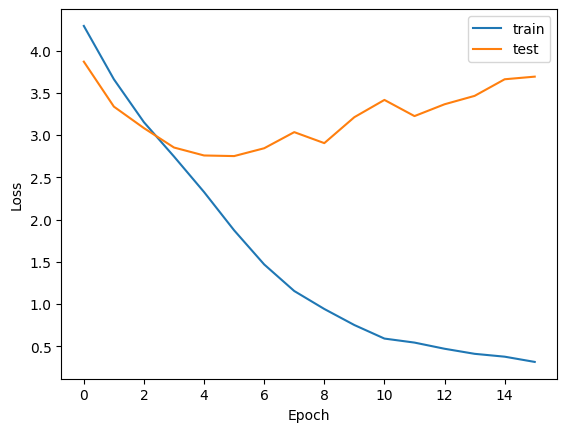

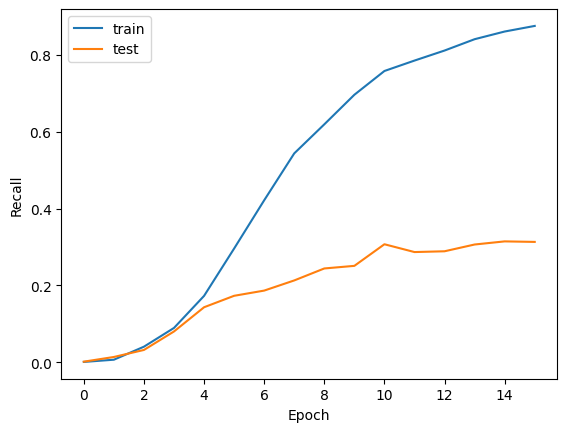

In [109]:
# plot of histroy_cnn_model2
plt.plot(histroy_cnn_model2.history['loss'], label='train')
plt.plot(histroy_cnn_model2.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot of histroy_cnn_model2
plt.plot(histroy_cnn_model2.history['Recall'], label='train')
plt.plot(histroy_cnn_model2.history['val_Recall'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()


## Archi2-mode1

#### Different between the two Architecture
- Number of Convolutional Layers and Filters:
In the second architecture, there are three convolutional layers with 64, 128, and 256 filters respectively, whereas the first architecture had two convolutional layers with 32 and 64 filters.
-  Pooling Strategy:
Both architectures use max-pooling layers after each convolutional layer, but the second architecture employs max-pooling layers with a pool size of (2, 2) after each convolutional layer, while the first architecture had a pool size of (2, 2) after the first two convolutional layers and no pooling after the last two convolutional layers.
- Dropout Rate:
The dropout rate in the second architecture is set to 0.5, which means half of the neurons will be randomly dropped out during training to prevent overfitting. In contrast, the dropout rate in the first architecture was set to 0.25.
- Optimizer:
The first architecture used the RMSprop optimizer, while the second architecture uses the Adam optimizer.

In [113]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_modela2m1():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(80, 80, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(102, activation='softmax'))
    
    return model

cnn_modela2m1 = build_model()
cnn_modela2m1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Recall'])
cnn_modela2m1.summary()




C:\Users\lycaz\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 78, 78, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 39, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,812,262 (33.62 MB)

 Trainable params: 8,812,262 (33.62 MB)

 Non-trainable params: 0 (0.00 B)

In [122]:
# fit the model build_modela2m1 and get the history of the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history_cnn_modela2m1 = cnn_modela2m1.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])



Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - Recall: 6.0847e-04 - loss: 4.3715 - val_Recall: 0.0000e+00 - val_loss: 3.6628
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - Recall: 0.0091 - loss: 3.5603 - val_Recall: 0.0231 - val_loss: 3.1353
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - Recall: 0.0616 - loss: 3.0238 - val_Recall: 0.1092 - val_loss: 2.7484
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - Recall: 0.1465 - loss: 2.5315 - val_Recall: 0.1281 - val_loss: 2.4564
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - Recall: 0.2194 - loss: 2.1326 - val_Recall: 0.2339 - val_loss: 2.2757
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - Recall: 0.3498 - loss: 1.6872 - val_Recall: 0.2719 - val_loss: 2.2606
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - Recall: 0.4592 - loss: 1.3516 - val_Recall: 0.3146 - val_loss: 2.1816
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - Recall: 0.5612 - loss: 1.0564 - val_Recall: 0.

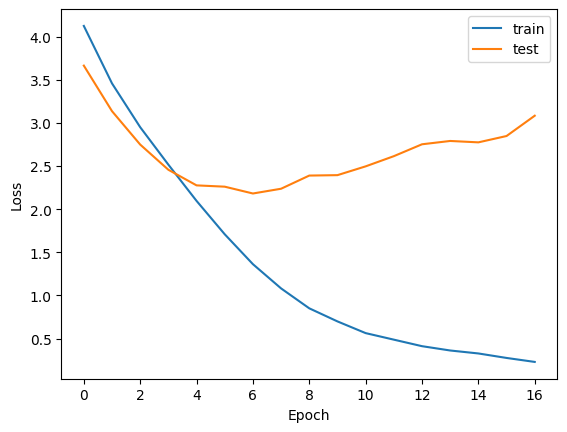

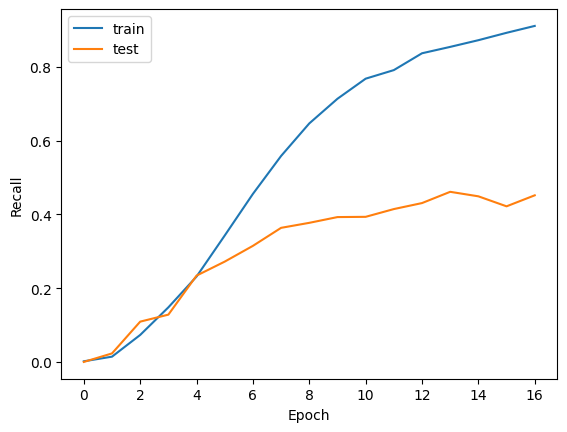

In [123]:
# plot the history of the model history_cnn_modela2m2
plt.plot(history_cnn_modela2m1.history['loss'], label='train')
plt.plot(history_cnn_modela2m1.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the history of the model history_cnn_modela2m2
plt.plot(history_cnn_modela2m1.history['Recall'], label='train')
plt.plot(history_cnn_modela2m1.history['val_Recall'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()


### Archi2- Model2

In [114]:
# based on the a2m1 model to build the a2m2 model, and the only difference is the number of the filter in the Conv2D, and the number of the Dense, and the metrics is accuracy
def build_modela2m2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(102, activation='softmax'))
    
    return model

cnn_modela2m2 = build_modela2m2()
cnn_modela2m2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_modela2m2.summary()



Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_71 (Conv2D)              │ (None, 78, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_30 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 102)            │        26,214 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,216,870 (8.46 MB)

 Trainable params: 2,216,870 (8.46 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
# fit the model build_modela2m2 and get the history of the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history_cnn_modela2m2 = cnn_modela2m2.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.0341 - loss: 4.4936 - val_accuracy: 0.0976 - val_loss: 3.9119
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.1132 - loss: 3.7822 - val_accuracy: 0.1661 - val_loss: 3.4632
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.1669 - loss: 3.3641 - val_accuracy: 0.2563 - val_loss: 3.0300
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.2475 - loss: 2.9937 - val_accuracy: 0.2929 - val_loss: 2.8001
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3059 - loss: 2.6513 - val_accuracy: 0.3166 - val_loss: 2.7008
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3689 - loss: 2.3207 - val_accuracy: 0.3898 - val_loss: 2.4870
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.4362 - loss: 2.0226 - val_accuracy: 0.3966 - val_loss: 2.3549
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.5025 - loss: 1.7759 - val_accu

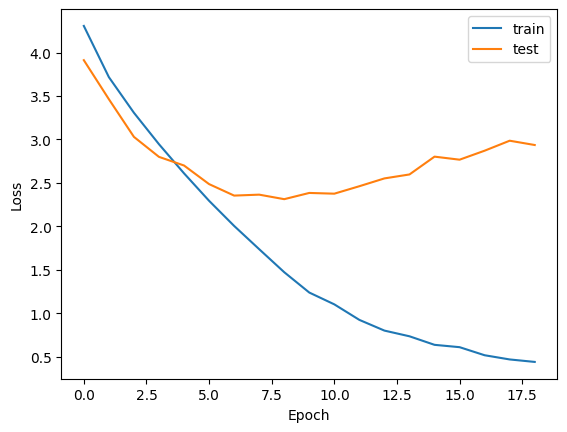

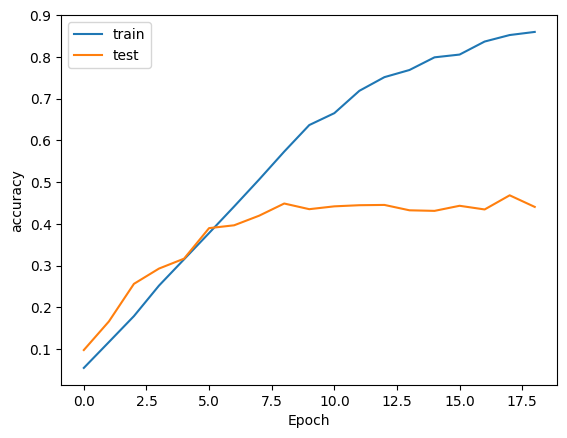

In [116]:
# plot the history of the model history_cnn_modela2m2
plt.plot(history_cnn_modela2m2.history['loss'], label='train')
plt.plot(history_cnn_modela2m2.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the history of the model history_cnn_modela2m2
plt.plot(history_cnn_modela2m2.history['accuracy'], label='train')
plt.plot(history_cnn_modela2m2.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


### Compared the models

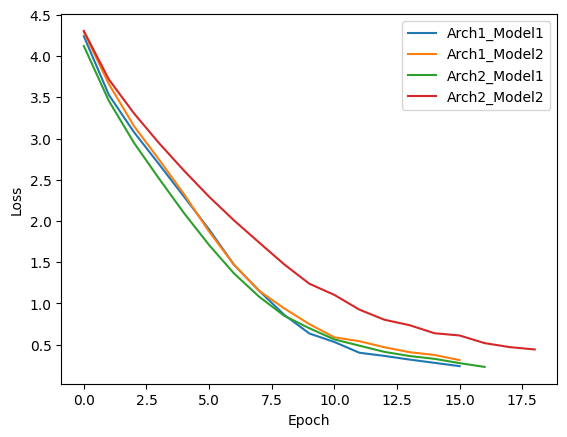

In [128]:
# compare the the lose of these 4 history  cnn_model1,cnn_model2, cnn_modela2m1, cnn_modela2m2 ,plot the loss of the 4 model in a same plot
plt.plot(cnn_model1.history.history['loss'], label='Arch1_Model1')
plt.plot(histroy_cnn_model2.history['loss'], label='Arch1_Model2')
plt.plot(history_cnn_modela2m1.history['loss'], label='Arch2_Model1')
plt.plot(history_cnn_modela2m2.history['loss'], label='Arch2_Model2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


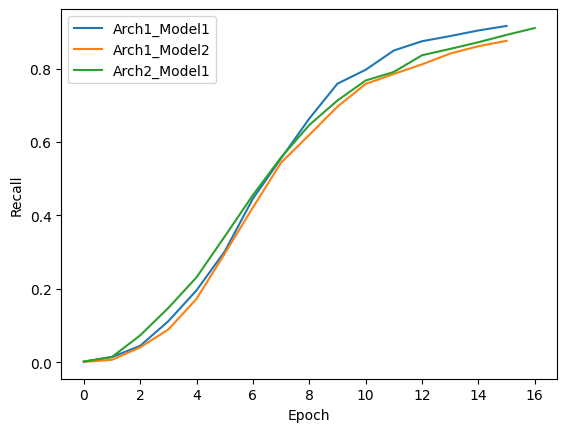

In [130]:
# show the recall of the 4 model in a same plot, cnn_model1,cnn_model2, cnn_modela2m1, cnn_modela2m2
plt.plot(cnn_model1.history.history['Recall'], label='Arch1_Model1')
plt.plot(histroy_cnn_model2.history['Recall'], label='Arch1_Model2')
plt.plot(history_cnn_modela2m1.history['Recall'], label='Arch2_Model1')

plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()


From the plot above ,we could conclude that , more layer may not direclty help improve the model, and the Pooling Strategy and Dropout Rate could generate the diffrent result in the different architecture. 

We could do more compared opration for analysis these models

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


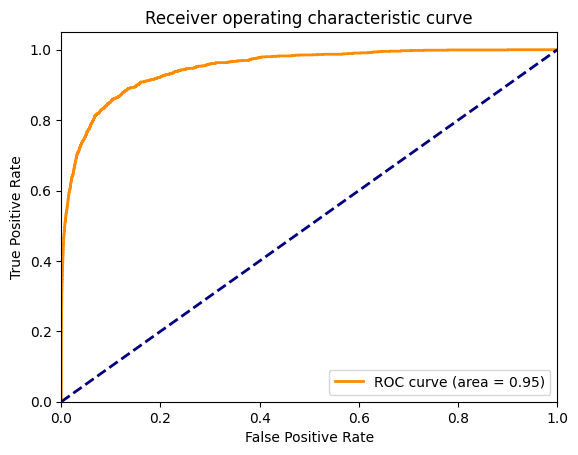

In [136]:
# using  receiver operating characteristic curve to show the model's performance, and the model is cnn_model1, my model is multi-class classification model, so I need to use the micro-average ROC curve, the classes is 102
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score = cnn_model1.predict(X_test)
y_test = label_binarize(y_test, classes=[i for i in range(102)])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(102):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()





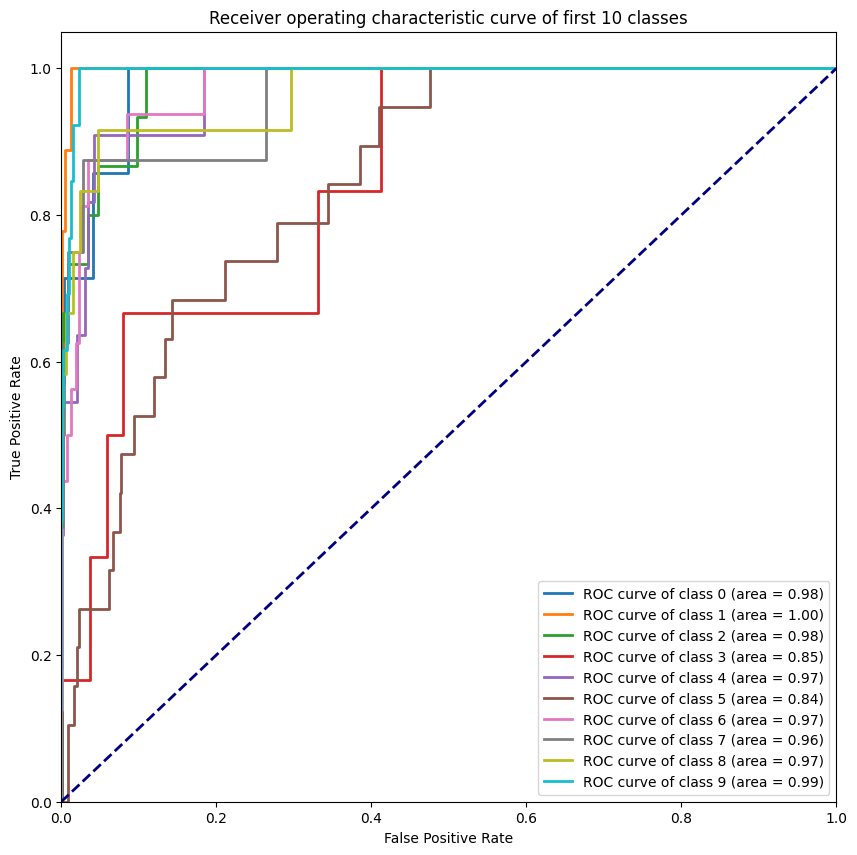

In [137]:
# show the first 10 class's ROC curve and analysis this first 10 class's ROC curve, show the plot of these 10 class's ROC curve
plt.figure(figsize=(10, 10))
lw = 2
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve of first 10 classes')
plt.legend(loc="lower right")
plt.show()


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


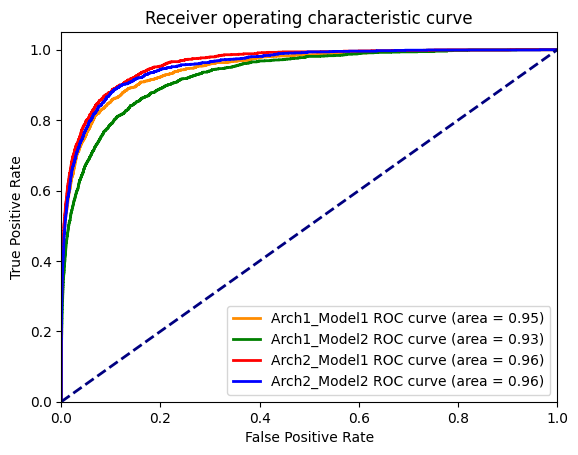

In [138]:
# show the 4 model's ROC curve in a same plot, cnn_model1,cnn_model2, cnn_modela2m1, cnn_modela2m2 , using the micro-average ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score1 = cnn_model1.predict(X_test)
y_score2 = cnn_model2.predict(X_test)
y_scorea2m1 = cnn_modela2m1.predict(X_test)
y_scorea2m2 = cnn_modela2m2.predict(X_test)

y_test = label_binarize(y_test, classes=[i for i in range(102)])
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
fpr2 = dict()
tpr2 = dict()

roc_auc2 = dict()
fpra2m1 = dict()
tpra2m1 = dict()
roc_auc2m1 = dict()
fpra2m2 = dict()
tpra2m2 = dict()
roc_auc2m2 = dict()

for i in range(102):
    fpr1[i], tpr1[i], _ = roc_curve(y_test[:, i], y_score1[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])
    fpr2[i], tpr2[i], _ = roc_curve(y_test[:, i], y_score2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])
    fpra2m1[i], tpra2m1[i], _ = roc_curve(y_test[:, i], y_scorea2m1[:, i])
    roc_auc2m1[i] = auc(fpra2m1[i], tpra2m1[i])
    fpra2m2[i], tpra2m2[i], _ = roc_curve(y_test[:, i], y_scorea2m2[:, i])
    roc_auc2m2[i] = auc(fpra2m2[i], tpra2m2[i])

fpr1["micro"], tpr1["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test.ravel(), y_score2.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])
fpra2m1["micro"], tpra2m1["micro"], _ = roc_curve(y_test.ravel(), y_scorea2m1.ravel())
roc_auc2m1["micro"] = auc(fpra2m1["micro"], tpra2m1["micro"])
fpra2m2["micro"], tpra2m2["micro"], _ = roc_curve(y_test.ravel(), y_scorea2m2.ravel())
roc_auc2m2["micro"] = auc(fpra2m2["micro"], tpra2m2["micro"])

plt.figure()
lw = 2
plt.plot(fpr1["micro"], tpr1["micro"], color='darkorange', lw=lw, label='Arch1_Model1 ROC curve (area = %0.2f)' % roc_auc1["micro"])
plt.plot(fpr2["micro"], tpr2["micro"], color='green', lw=lw, label='Arch1_Model2 ROC curve (area = %0.2f)' % roc_auc2["micro"])
plt.plot(fpra2m1["micro"], tpra2m1["micro"], color='red', lw=lw, label='Arch2_Model1 ROC curve (area = %0.2f)' % roc_auc2m1["micro"])
plt.plot(fpra2m2["micro"], tpra2m2["micro"], color='blue', lw=lw, label='Arch2_Model2 ROC curve (area = %0.2f)' % roc_auc2m2["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()


C:\Users\lycaz\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_32 (Flatten)            │ (None, 19200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 512)            │     9,830,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,883,238 (37.70 MB)

 Trainable params: 9,883,238 (37.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.0245 - loss: 6.4204 - val_accuracy: 0.0420 - val_loss: 4.5091
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.0552 - loss: 4.4989 - val_accuracy: 0.0475 - val_loss: 4.3566
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.0487 - loss: 4.3982 - val_accuracy: 0.0454 - val_loss: 4.3676
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.0548 - loss: 4.3677 - val_accuracy: 0.0515 - val_loss: 4.2639
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.0497 - loss: 4.3443 - val_accuracy: 0.0515 - val_loss: 4.2465
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.0525 - loss: 4.3053 - val_accuracy: 0.0447 - val_loss: 4.2474
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.0520 - loss: 4.3191 - val_accuracy: 0.0447 - val_loss: 4.2488
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.0482 - loss: 4.3038 - val_accu

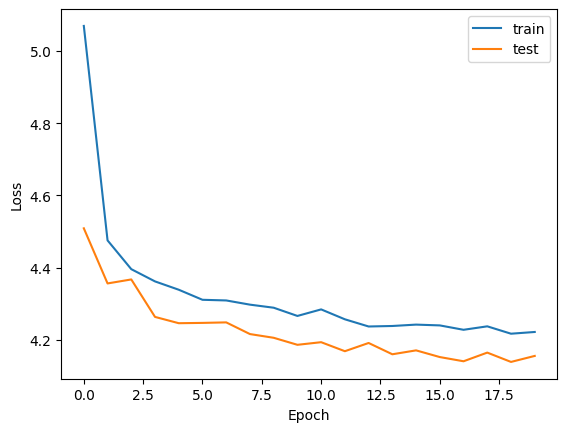

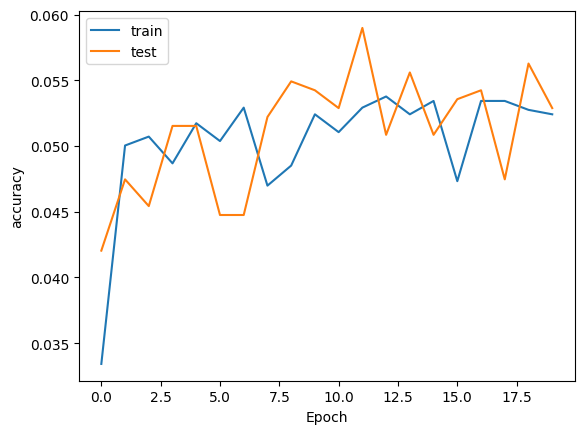

In [139]:
# compare the 4 models' to standard multi-layer perceptron model,

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

def build_mlp_model():
    model = Sequential()
    model.add(Flatten(input_shape=(80, 80, 3)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(102, activation='softmax'))
    return model

mlp_model = build_mlp_model()
mlp_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
mlp_model.summary()

# fit the model build_mlp_model and get the history of the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history_mlp_model = mlp_model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

# plot the history of the model history_mlp_model
plt.plot(history_mlp_model.history['loss'], label='train')
plt.plot(history_mlp_model.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the history of the model history_mlp_model
plt.plot(history_mlp_model.history['accuracy'], label='train')
plt.plot(history_mlp_model.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


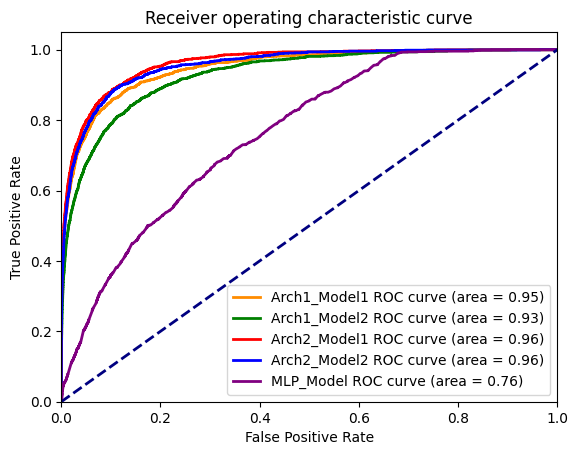

In [141]:
# show  ROC curve of the standard multi-layer perceptron model, compared with my 4 models, cnn_model1,cnn_model2, cnn_modela2m1, cnn_modela2m2
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score1 = cnn_model1.predict(X_test)
y_score2 = cnn_model2.predict(X_test)
y_scorea2m1 = cnn_modela2m1.predict(X_test)
y_scorea2m2 = cnn_modela2m2.predict(X_test)
y_score_mlp = mlp_model.predict(X_test)

y_test = label_binarize(y_test, classes=[i for i in range(102)])
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
fpra2m1 = dict()
tpra2m1 = dict()
roc_auc2m1 = dict()
fpra2m2 = dict()
tpra2m2 = dict()
roc_auc2m2 = dict()
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()

for i in range(102):
    fpr1[i], tpr1[i], _ = roc_curve(y_test[:, i], y_score1[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])
    fpr2[i], tpr2[i], _ = roc_curve(y_test[:, i], y_score2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])
    fpra2m1[i], tpra2m1[i], _ = roc_curve(y_test[:, i], y_scorea2m1[:, i])
    roc_auc2m1[i] = auc(fpra2m1[i], tpra2m1[i])
    fpra2m2[i], tpra2m2[i], _ = roc_curve(y_test[:, i], y_scorea2m2[:, i])
    roc_auc2m2[i] = auc(fpra2m2[i], tpra2m2[i])
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test[:, i], y_score_mlp[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

fpr1["micro"], tpr1["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test.ravel(), y_score2.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])
fpra2m1["micro"], tpra2m1["micro"], _ = roc_curve(y_test.ravel(), y_scorea2m1.ravel())
roc_auc2m1["micro"] = auc(fpra2m1["micro"], tpra2m1["micro"])
fpra2m2["micro"], tpra2m2["micro"], _ = roc_curve(y_test.ravel(), y_scorea2m2.ravel())
roc_auc2m2["micro"] = auc(fpra2m2["micro"], tpra2m2["micro"])
fpr_mlp["micro"], tpr_mlp["micro"], _ = roc_curve(y_test.ravel(), y_score_mlp.ravel())
roc_auc_mlp["micro"] = auc(fpr_mlp["micro"], tpr_mlp["micro"])

plt.figure()
lw = 2
plt.plot(fpr1["micro"], tpr1["micro"], color='darkorange', lw=lw, label='Arch1_Model1 ROC curve (area = %0.2f)' % roc_auc1["micro"])
plt.plot(fpr2["micro"], tpr2["micro"], color='green', lw=lw, label='Arch1_Model2 ROC curve (area = %0.2f)' % roc_auc2["micro"])
plt.plot(fpra2m1["micro"], tpra2m1["micro"], color='red', lw=lw, label='Arch2_Model1 ROC curve (area = %0.2f)' % roc_auc2m1["micro"])
plt.plot(fpra2m2["micro"], tpra2m2["micro"], color='blue', lw=lw, label='Arch2_Model2 ROC curve (area = %0.2f)' % roc_auc2m2["micro"])
plt.plot(fpr_mlp["micro"], tpr_mlp["micro"], color='purple', lw=lw, label='MLP_Model ROC curve (area = %0.2f)' % roc_auc_mlp["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()



## Exceptinal


In [142]:
# based on the cnn_model1 , and using Use transfer learning with pre-trained weights for your initial layers, and the pre-trained model is VGG16, and the image size is 80*80, and the classification is 102
from keras.applications import VGG16
from keras.models import Model

def build_transfer_model():
    vgg = VGG16(include_top=False, input_shape=(80, 80, 3))
    for layer in vgg.layers:
        layer.trainable = False
    flat1 = Flatten()(vgg.layers[-1].output)
    class1 = Dense(102, activation='softmax')(flat1)
    model = Model(inputs=vgg.inputs, outputs=class1)
    return model

transfer_model = build_transfer_model()
transfer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
transfer_model.summary()



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 80, 80, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 80, 80, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 80, 80, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 40, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 20, 20, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 20, 20, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_33 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 102)            │       208,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,923,686 (56.93 MB)

 Trainable params: 208,998 (816.40 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# fit the model build_transfer_model and get the history of the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history_transfer_model = transfer_model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])
